### Data Cleaning

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [13]:
all_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\all_wine_with_dummies.csv', sep=',')

white_wine = all_wine[all_wine['type']==0]

In [14]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [15]:
encoder = LabelEncoder()

white_wine['quality'] = encoder.fit_transform(white_wine['quality'])
{index: label for index, label in enumerate(encoder.classes_)}

C:\Users\janin\AppData\Local\Temp\ipykernel_24424\2165483198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine['quality'] = encoder.fit_transform(white_wine['quality'])


{0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8, 6: 9}

In [16]:
y = white_wine['quality']
X = white_wine.drop('quality', axis=1)

In [17]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [18]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_label,type
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.560596,0.0
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.560596,0.0
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.560596,0.0
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.560596,0.0
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.560596,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.560596,0.0
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-1.320087,0.0
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.560596,0.0
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,0.560596,0.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### Correlation Maps

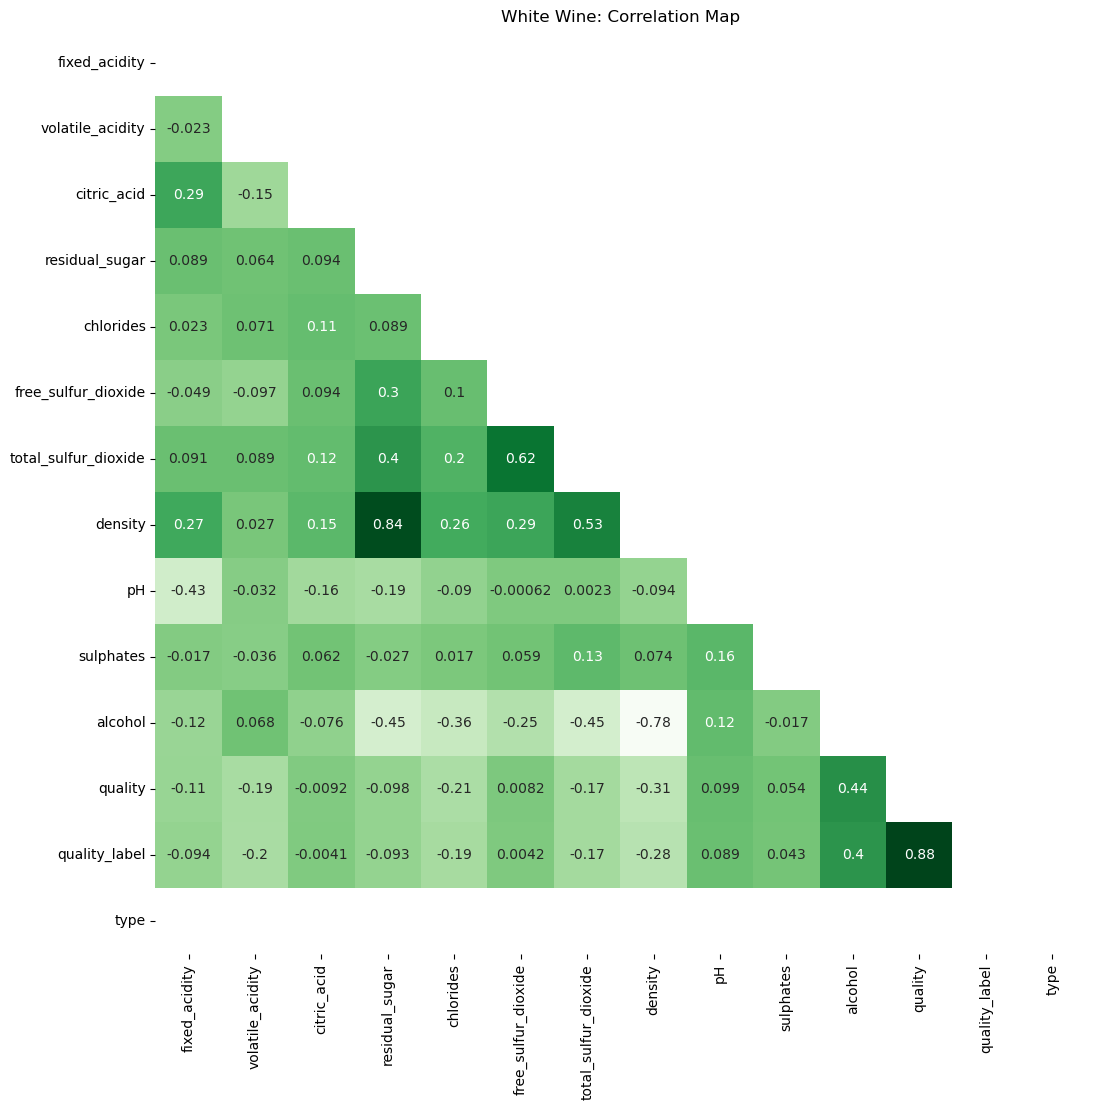

In [23]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(white_wine.corr()))
sns.heatmap(white_wine.corr(), annot=True, cbar=False, mask = mask, cmap='Greens').set_title('White Wine: Correlation Map')

plt.show()


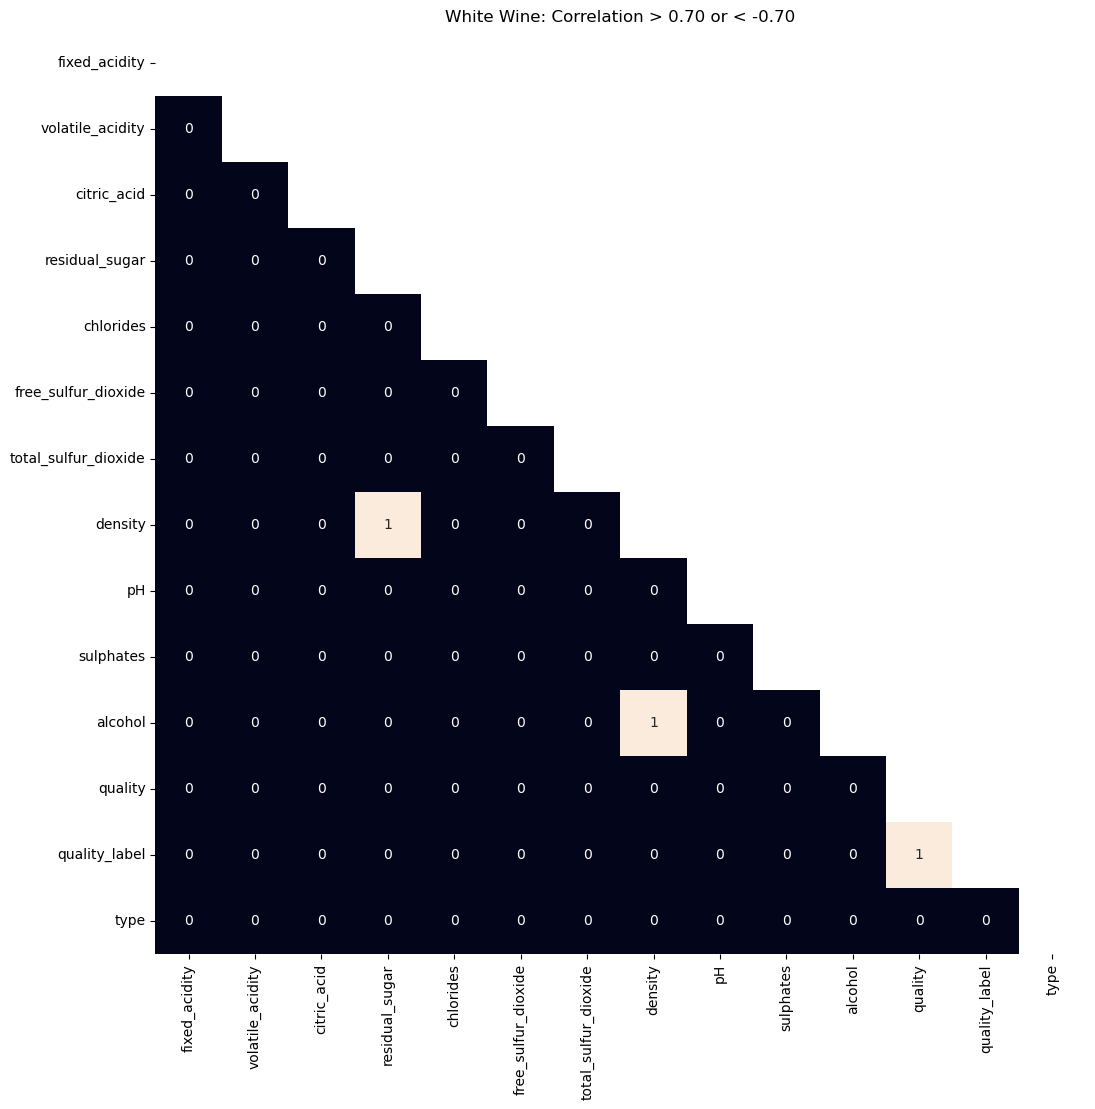

In [62]:
#Heatmap for Correlation > 0.7 or < -0.7
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(white_wine.corr(), dtype=bool))  # Upper triangular mask
correlation_matrix = white_wine.corr()
sns.heatmap((correlation_matrix > 0.7) | (correlation_matrix < -0.7), mask=mask, annot=True, cbar=False, fmt='.0f').set_title('White Wine: Correlation > 0.70 or < -0.70')
plt.show()

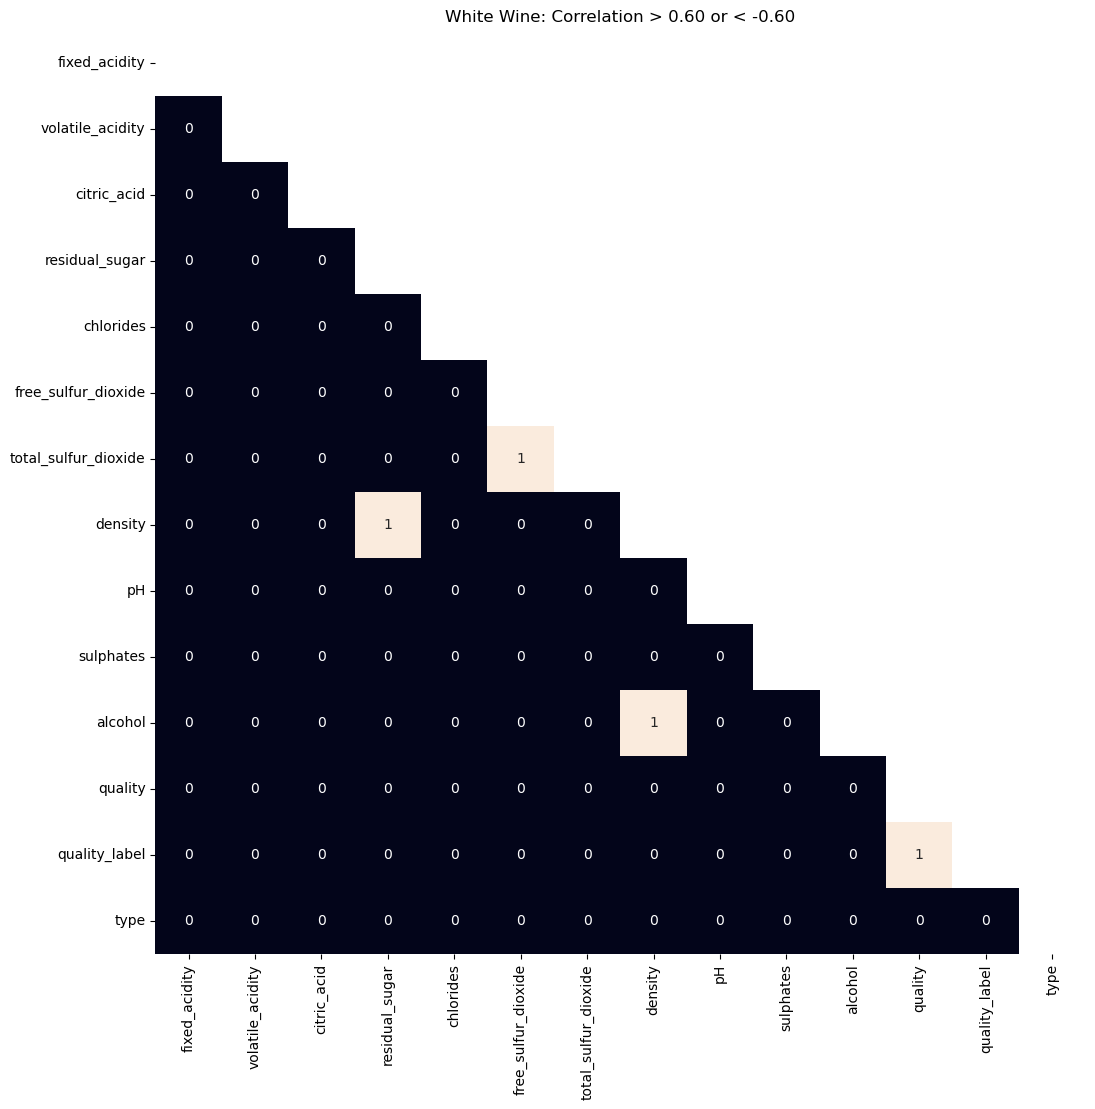

In [63]:
#Heatmap for Correlation > 0.7 or < -0.7
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(white_wine.corr(), dtype=bool))  # Upper triangular mask
correlation_matrix = white_wine.corr()
sns.heatmap((correlation_matrix > 0.6) | (correlation_matrix < -0.6), mask=mask, annot=True, cbar=False, fmt='.0f').set_title('White Wine: Correlation > 0.60 or < -0.60')
plt.show()

### ML Quality Label / no alterations

In [72]:
white_wine_ml_qual = white_wine.drop('quality', axis=1)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Split data into X and Y
X = white_wine_ml_qual.drop('quality_label', axis=1)
y = white_wine_ml_qual['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Logistic Regression model
    LR_model = LogisticRegression(random_state=42, max_iter=2000)
    
    # Fit the model
    LR_model.fit(x_train, y_train)
    
    # Predictions
    preds = LR_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Optional: Print classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

Confusion Matrix:
 [[291 256   0]
 [132 894   0]
 [  0  60   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60       547
           1       0.74      0.87      0.80      1026
           2       0.00      0.00      0.00        60

    accuracy                           0.73      1633
   macro avg       0.48      0.47      0.47      1633
weighted avg       0.69      0.73      0.70      1633



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

Confusion Matrix:
 [[279 268   0]
 [145 881   0]
 [  3  57   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.51      0.57       547
           1       0.73      0.86      0.79      1026
           2       0.00      0.00      0.00        60

    accuracy                           0.71      1633
   macro avg       0.46      0.46      0.45      1633
weighted avg       0.68      0.71      0.69      1633

Confusion Matrix:
 [[257 289   0]
 [135 891   0]
 [  4  56   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.47      0.55       546
           1       0.72      0.87      0.79      1026
           2       0.00      0.00      0.00        60

    accuracy                           0.70      1632
   macro avg       0.46      0.45      0.44      1632
weighted avg       0.67      0.70      0.68      1632

Mean Accuracy across all folds:  0.7131462403291589


c:\Users\janin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

### Random Forest: K-Fold

In [79]:
white_wine_ml_qual = white_wine.drop('quality', axis=1)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Split data into X and Y
X = white_wine_ml_qual.drop('quality_label', axis=1)
y = white_wine_ml_qual['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    
    # Fit the model
    rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Optional: Print classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

Confusion Matrix:
 [[238  90   0]
 [ 66 549   1]
 [  0  23  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       328
           1       0.83      0.89      0.86       616
           2       0.93      0.36      0.52        36

    accuracy                           0.82       980
   macro avg       0.85      0.66      0.71       980
weighted avg       0.82      0.82      0.81       980

Confusion Matrix:
 [[223 105   0]
 [ 69 547   0]
 [  0  18  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       328
           1       0.82      0.89      0.85       616
           2       1.00      0.50      0.67        36

    accuracy                           0.80       980
   macro avg       0.86      0.69      0.75       980
weighted avg       0.81      0.80      0.80       980

Confusion Matrix:
 [[239  89   0]
 [ 59 557   0]
 [  0  21  

### Dropping Highly Correlated Features

In [110]:
#Dropping 'free_sulfur_dioxide' due to correlation with 'total_sulfur_dioxide', keeping 'total...' due to slightly higher correlation with 'quality'
#Dropping 'density' die to correlation with 'alcohol', keeping 'alcohol' due to higher correlation with quality
#all_wine_reduced=all_wine_with_dummies.copy()

white_wine_reduced = white_wine_ml_qual.drop(['free_sulfur_dioxide', 'pH', 'density', 'sulphates'], axis=1)
white_wine_reduced.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
0,7.0,0.27,0.36,20.7,0.045,170.0,8.8,1,0
1,6.3,0.30,0.34,1.6,0.049,132.0,9.5,1,0
2,8.1,0.28,0.40,6.9,0.050,97.0,10.1,1,0
3,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0
4,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0


### Random Forest: K-Fold, dropped columns

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np


from sklearn.ensemble import RandomForestClassifier

# Split data into X and Y
X = white_wine_reduced.drop('quality_label', axis=1)
y = white_wine_reduced['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(class_weight='balanced')
    
    # Fit the model
    rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Optional: Print classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

Confusion Matrix:
 [[230  98   0]
 [ 57 559   0]
 [  1  23  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75       328
           1       0.82      0.91      0.86       616
           2       1.00      0.33      0.50        36

    accuracy                           0.82       980
   macro avg       0.87      0.65      0.70       980
weighted avg       0.82      0.82      0.81       980

Confusion Matrix:
 [[208 120   0]
 [ 63 553   0]
 [  0  18  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.69       328
           1       0.80      0.90      0.85       616
           2       1.00      0.50      0.67        36

    accuracy                           0.79       980
   macro avg       0.86      0.68      0.74       980
weighted avg       0.80      0.79      0.79       980

Confusion Matrix:
 [[227 101   0]
 [ 58 558   0]
 [  0  21  

### Outlier Removal

In [132]:
#This is based on the boxplot: the features that have strong outliers, but are not correlating much with 'quality' are:

#0,014 Residual Sugar
#0,038 Sulphates
#0,051 Free Sulfur Dioxide
#0,058 pH

#Outliers are only removed for low and medium quality:

white_wine_low = white_wine_reduced[white_wine_ml_qual['quality_label'] == 0]
white_wine_medium = white_wine_reduced[white_wine_ml_qual['quality_label'] == 1]
white_wine_high = white_wine_reduced[white_wine_ml_qual['quality_label'] == 2]

In [133]:
white_wine_low.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
10,8.1,0.27,0.41,1.45,0.033,63.0,12.0,0,0
11,8.6,0.23,0.40,4.20,0.035,109.0,9.7,0,0
12,7.9,0.18,0.37,1.20,0.040,75.0,10.8,0,0
14,8.3,0.42,0.62,19.25,0.040,172.0,9.7,0,0
19,6.5,0.31,0.14,7.50,0.044,133.0,9.5,0,0


In [134]:
white_wine_medium.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
0,7.0,0.27,0.36,20.7,0.045,170.0,8.8,1,0
1,6.3,0.30,0.34,1.6,0.049,132.0,9.5,1,0
2,8.1,0.28,0.40,6.9,0.050,97.0,10.1,1,0
3,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0
4,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0


In [135]:
white_wine_high.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
17,6.2,0.66,0.48,1.2,0.029,75.0,12.8,2,0
20,6.2,0.66,0.48,1.2,0.029,75.0,12.8,2,0
22,6.8,0.26,0.42,1.7,0.049,122.0,10.5,2,0
68,6.7,0.23,0.31,2.1,0.046,96.0,10.7,2,0
74,6.7,0.23,0.31,2.1,0.046,96.0,10.7,2,0


In [137]:
def remove_outliers(df, columns):

    # Create a copy of the DataFrame
    df_copy = df.copy()

    for col in columns:
        if col in df_copy.columns:  # Ensure the column exists
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Print IQR and bounds for debugging (optional)
            print(f"Column: {col}")
            print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
            print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

            # Filter the DataFrame to exclude outliers
            before_rows = df_copy.shape[0]
            df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
            after_rows = df_copy.shape[0]

            # Print how many rows were removed (optional)
            print(f"Rows before: {before_rows}, Rows after: {after_rows}\n")
        else:
            print(f"Column '{col}' not found in DataFrame.")
    
    return df_copy

In [138]:
white_wine_low = pd.DataFrame(white_wine_low)

# Remove outliers from the specified columns
white_wine_low_cleaned = remove_outliers(white_wine_low, ['residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'pH'])

# Display the original and cleaned DataFrames
print("Original DataFrame:")
print(white_wine_low)
print("\nCleaned DataFrame (with outliers removed):")
print(white_wine_low_cleaned)


Column: residual_sugar
Q1: 1.7, Q3: 11.025, IQR: 9.325000000000001
Lower bound: -12.287500000000001, Upper bound: 25.012500000000003
Rows before: 1640, Rows after: 1640

Column 'sulphates' not found in DataFrame.
Column: total_sulfur_dioxide
Q1: 117.0, Q3: 182.0, IQR: 65.0
Lower bound: 19.5, Upper bound: 279.5
Rows before: 1640, Rows after: 1630

Column 'pH' not found in DataFrame.
Original DataFrame:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
10              8.1              0.27         0.41            1.45      0.033   
11              8.6              0.23         0.40            4.20      0.035   
12              7.9              0.18         0.37            1.20      0.040   
14              8.3              0.42         0.62           19.25      0.040   
19              6.5              0.31         0.14            7.50      0.044   
...             ...               ...          ...             ...        ...   
4882            5.5         

In [139]:
white_wine_low_cleaned.shape

(1630, 9)

In [140]:
white_wine_medium = pd.DataFrame(white_wine_medium)

# Remove outliers from the specified columns
white_wine_medium_cleaned = remove_outliers(white_wine_medium, ['residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'pH'])

# Display the original and cleaned DataFrames
print("Original DataFrame:")
print(white_wine_medium)
print("\nCleaned DataFrame (with outliers removed):")
print(white_wine_medium_cleaned)

Column: residual_sugar
Q1: 1.7, Q3: 9.2, IQR: 7.499999999999999
Lower bound: -9.549999999999999, Upper bound: 20.449999999999996
Rows before: 3078, Rows after: 3069

Column 'sulphates' not found in DataFrame.
Column: total_sulfur_dioxide
Q1: 105.0, Q3: 158.0, IQR: 53.0
Lower bound: 25.5, Upper bound: 237.5
Rows before: 3069, Rows after: 3037

Column 'pH' not found in DataFrame.
Original DataFrame:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4891            5.7             

In [141]:
white_wine_medium_cleaned.shape

(3037, 9)

In [142]:
white_wine_high.shape

(180, 9)

In [143]:
white_wine_cleaned = pd.concat([white_wine_low_cleaned, white_wine_medium_cleaned, white_wine_high], ignore_index=True)

In [144]:
white_wine_cleaned.shape

(4847, 9)

In [145]:
white_wine_cleaned

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
0,8.1,0.270,0.41,1.45,0.033,63.0,12.0,0,0
1,8.6,0.230,0.40,4.20,0.035,109.0,9.7,0,0
2,7.9,0.180,0.37,1.20,0.040,75.0,10.8,0,0
3,8.3,0.420,0.62,19.25,0.040,172.0,9.7,0,0
4,6.5,0.310,0.14,7.50,0.044,133.0,9.5,0,0
...,...,...,...,...,...,...,...,...,...
4842,5.2,0.300,0.34,1.50,0.038,96.0,13.0,2,0
4843,6.4,0.320,0.25,5.00,0.055,138.0,12.4,2,0
4844,4.4,0.320,0.39,4.30,0.030,127.0,12.8,2,0
4845,3.9,0.225,0.40,4.20,0.030,118.0,12.8,2,0


### Random Forest: K-Fold, dropped columns, removed outliers from low/medium

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Assuming white_wine_reduced is your DataFrame containing the data

# Split data into X and Y
X = white_wine_cleaned.drop('quality_label', axis=1)
y = white_wine_cleaned['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Random Forest model with class weights
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
    
    # Fit the model
    rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Print confusion matrix and classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]}")

Confusion Matrix:
 [[229  97   0]
 [ 50 557   1]
 [  0  24  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76       326
           1       0.82      0.92      0.87       608
           2       0.92      0.33      0.49        36

    accuracy                           0.82       970
   macro avg       0.86      0.65      0.70       970
weighted avg       0.83      0.82      0.82       970

Confusion Matrix:
 [[217 109   0]
 [ 64 543   1]
 [  0  26  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71       326
           1       0.80      0.89      0.84       608
           2       0.91      0.28      0.43        36

    accuracy                           0.79       970
   macro avg       0.83      0.61      0.66       970
weighted avg       0.80      0.79      0.79       970

Confusion Matrix:
 [[205 121   0]
 [ 60 546   1]
 [  1  23  